## 3.2 필기체를 분류하는 DNN 구현
4단계로 은닉 계층이 늘어난 DNN을 케라스로 구현합니다.

### 3.2.1 기본 파라미터 설정 
이 절에서는 4단계로 은닉 계층이 늘어난 DNN을 케라스로 구현합니다.

#### 3.2.1 기본 파라미터 설정
 1. DNN 구현에 필요한 파라미터를 정의합니다.

In [1]:
Nin = 784
Nh_l = [100, 50]
number_of_class = 10
Nout = number_of_class

### 3.2.2 DNN 모델 구현
2. 필기체 분류를 위한 DNN 모델을 구현합니다. 

In [2]:
from keras import layers, models
 
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Nout):
        super().__init__()
        self.add(layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(Nh_l[1], activation='relu', name='Hidden-2'))       
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', 
                         optimizer='adam', 
                         metrics=['accuracy'])

### 3.2.3 데이터 준비
3. 분류 DNN을 위한 데이터 준비는 2.2.2절 ‘분류 ANN에 사용할 데이터 불러오기’와 같습니다

In [3]:
import numpy as np 
from keras import datasets              
from keras.utils import np_utils 
 
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

### 3.2.4 학습 및 성능 평가
4. 다음은 학습과 성능 평가 단계입니다.

Epoch 1/5
480/480 [==============================] - 2s 5ms/step - loss: 0.3798 - accuracy: 0.8917 - val_loss: 0.1816 - val_accuracy: 0.9493
Epoch 2/5
480/480 [==============================] - 2s 5ms/step - loss: 0.1568 - accuracy: 0.9536 - val_loss: 0.1361 - val_accuracy: 0.9594
Epoch 3/5
480/480 [==============================] - 2s 5ms/step - loss: 0.1127 - accuracy: 0.9669 - val_loss: 0.1140 - val_accuracy: 0.9678
Epoch 4/5
480/480 [==============================] - 2s 5ms/step - loss: 0.0864 - accuracy: 0.9742 - val_loss: 0.1032 - val_accuracy: 0.9713
Epoch 5/5
100/100 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.9722
Test Loss and Accuracy -> [0.0929151177406311, 0.9721999764442444]


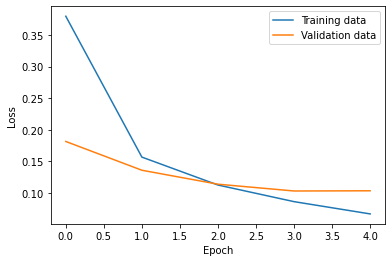

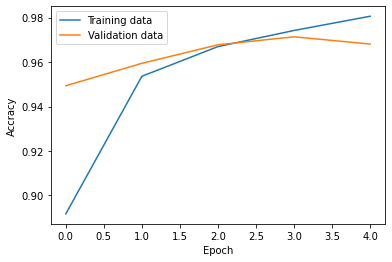

In [6]:
import matplotlib.pyplot as plt
from keraspp.skeras import plot_loss, plot_acc

model = DNN(Nin, Nh_l, Nout)
(X_train, Y_train), (X_test, Y_test) = Data_func()

history = model.fit(X_train, Y_train, epochs=5, batch_size=100, validation_split=0.2)
performace_test = model.evaluate(X_test, Y_test, batch_size=100)
print('Test Loss and Accuracy ->', performace_test)

plot_loss(history)
plt.show()
plot_acc(history)
plt.show()

---
### 3.2.5 전체 코드 

2021-09-21 17:26:36.865287: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-09-21 17:26:37.089423: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-09-21 17:26:37.089572: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.455GHz coreCount: 5 deviceMemorySize: 2.00GiB deviceMemoryBandwidth: 104.43GiB/s
2021-09-21 17:26:37.089789: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-09-21 17:26:37.091210: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-09-21 17:26:37.092402: I tensorflow/stream_executor

Epoch 1/5
  1/480 [..............................] - ETA: 0s - loss: 2.3828 - accuracy: 0.1200

2021-09-21 17:26:39.065867: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


480/480 [==============================] - 3s 5ms/step - loss: 0.3757 - accuracy: 0.8942 - val_loss: 0.1889 - val_accuracy: 0.9469
Epoch 2/5
480/480 [==============================] - 2s 5ms/step - loss: 0.1615 - accuracy: 0.9521 - val_loss: 0.1384 - val_accuracy: 0.9591
Epoch 3/5
480/480 [==============================] - 3s 5ms/step - loss: 0.1133 - accuracy: 0.9664 - val_loss: 0.1181 - val_accuracy: 0.9656
Epoch 4/5
480/480 [==============================] - 2s 5ms/step - loss: 0.0880 - accuracy: 0.9737 - val_loss: 0.1083 - val_accuracy: 0.9675
Epoch 5/5
100/100 [==============================] - 0s 3ms/step - loss: 0.0876 - accuracy: 0.9730
Test Loss and Accuracy -> [0.087553009390831, 0.9729999899864197]


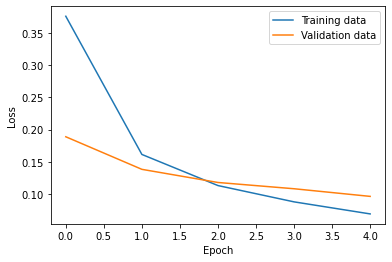

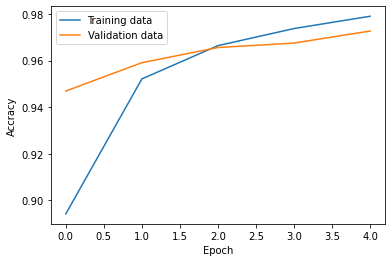

In [1]:
# File: ex3_1_dnn_mnist_cl.py

# 1. 기본 파라미터 설정
Nin = 784
Nh_l = [100, 50]
number_of_class = 10
Nout = number_of_class
 
# 1. 분류 DNN 모델 구현 
from keras import layers, models
 
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Nout):
        super().__init__()
        self.add(layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(Nh_l[1], activation='relu', name='Hidden-2'))       
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', 
                         optimizer='adam', 
                         metrics=['accuracy'])
        
# 3. 데이터 준비
import numpy as np 
from keras import datasets              
from keras.utils import np_utils 
 
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)
 
# 4. 분류 DNN 학습 및 테스팅 
import matplotlib.pyplot as plt
from keraspp.skeras import plot_loss, plot_acc

def main():
    model = DNN(Nin, Nh_l, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()

    history = model.fit(X_train, Y_train, epochs=5, batch_size=100, validation_split=0.2)
    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)

    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()
    
main()    